In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [15]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# Reflecting Tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [66]:
info_df = pd.read_sql("select * from measurement", conn)
info_df

info_stat_df = pd.read_sql("select * from station", conn)
info_stat_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Climate Analysis

In [25]:
last_d = pd.read_sql("select max(date) from measurement", conn)
last_d

,max(date)
0,2017-08-23


<Figure size 864x576 with 0 Axes>

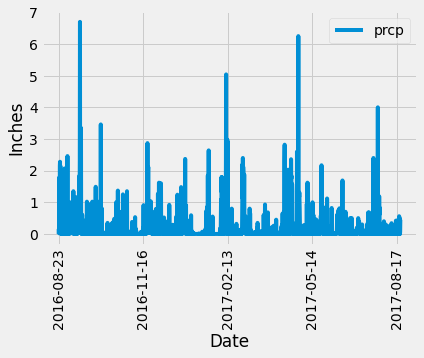

In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
ld = dt.date(2017, 8, 23)
one_year_ago = ld - dt.timedelta(days=365)
#print("The date 1 year ago: ", one_year_ago)

# Perform a query to retrieve the data and precipitation scores
# precip_df = pd.read_sql("select date, prcp from measurement where date >= '2016-08-23' order by 1", conn)
# precip_df

precip = session.query(measurement.date,measurement.prcp).filter(measurement.date >= one_year_ago).\
         order_by(measurement.date).all()
#precip

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip, columns=["date","prcp"])
precip_df.set_index("date").head()
precip_df = precip_df.dropna()
# precip_df

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot("date", "prcp")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation = 90) 
plt.show()

In [55]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [58]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(station).group_by(station.station).count()
print(f"There are {stations} in the dataset")

There are 9 in the dataset


In [60]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
staions_active = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
staions_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
highest_temp = session.query(func.max(measurement.tobs)).all()
aver_temp = session.query(func.avg(measurement.tobs)).all()
lowest_temp = session.query(func.min(measurement.tobs)).all()

print(f"The highest temperature in the dataset is {highest_temp}")
print(f"The lowest temperature in the dataset is {lowest_temp}")
print(f"The average temperature in the dataset is {aver_temp}")

The highest temperature in the dataset is [(87.0,)]
The lowest temperature in the dataset is [(53.0,)]
The average temperature in the dataset is [(73.09795396419437,)]


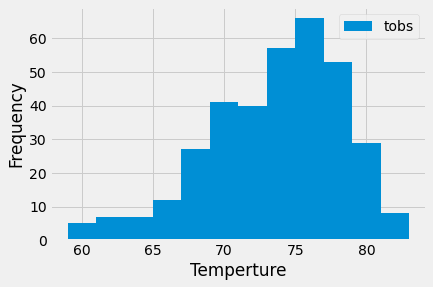

In [85]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_obs = session.query(measurement.station, measurement.date, measurement.tobs).\
              filter(measurement.station == "USC00519281").\
              filter(measurement.date >= one_year_ago).order_by(measurement.date).all()
highest_obs

highest_obs_df = pd.DataFrame(highest_obs, columns=["station","date","tobs"])
highest_obs_df
plt.hist(highest_obs_df["tobs"], bins=12)
plt.xlabel("Temperture")
plt.ylabel("Frequency")
labels= ["tobs"]
plt.legend(labels)
plt.show()

## Bonus Challenge Assignment